# IBM Data Science Professional Certificate capstone project

## Capstone Project - The Battle of Neighborhoods


## Table of contents
1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis](#analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

### 1.1. Background

The city of Buenos Aires, Federal District and capital of Argentina, is the most populated city in the Argentine Republic with a population of approximately 3,000,000 (2010) and the Metropolitan Area of Buenos Aires (AMBA), made up of the city of Buenos Aires and 40 surrounding *municipios*, 15,000,000 (2010), according to the National Institute of Statistics and Censuses of the Argentine Republic.

The city of Buenos Aires is among the cities with the highest quality of life in Latin America, and its per capita income is among the three highest in the region. It is the most visited city in South America due to its cultural diversity, commerce, industry, politics, culture, and technology.

The 2010 national census estimated that approximately 2,000,000 immigrants born in another country resided in Argentina, equivalent to 4.5% of the population. At a global level, Argentina is ranked 29th for the number of immigrants in its territory, being the largest recipient of immigrants from Latin America and Buenos Aires being one of the main cities that houses this foreign population.

### 1.2. Business Problem

Given the large amount of immigrant population that the city of Buenos Aires has, it is presented as a great opportunity, to open a restaurant that satisfies a gastronomic need for typical food of some foreign country or countries, analyzing the amount of immigrant population by areas, as well the existing competition in them, in order to obtain as a result the best area to open the restaurant and the best type of food to sell, that is, if it will be for example, a Peruvian, Spanish or Indian restaurant.

## 2. Data <a name="data"></a>

### 2.1 Data sources

The data used for this project are presented below:

 1 - Foursquare Location Data: Venues information of each commune/neighborhood. We are only going to use the restaurants and their coordinates.

 2 - Buenos Aires communes and neighbourhoods dataset: All the names of Buenos Aires communes and its neighborhoods.
 
 https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv

 3 - GeoJson dataset: Communes boundaries that will help to visualize communes on the map.

 https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/CABA_comunas.geojson

 4 - Coordinates of Buenos Aires communes: Latitude and longitude of each Buenos Aires commune.

 https://www.municipalidad-argentina.com.ar/municipalidad-buenos-aires-ar.html

 5 - Foreign population of communes dataset: Number of foreign population of each commune.

 https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-135

### 2.2 Python libraries

The following libraries are used in this project:

In [2]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim # Convert an address into latitude and longitude values
import folium # Map rendering library

import json # To handle JSON files

from sklearn.cluster import KMeans # Import k-means from clustering stage
import sklearn.metrics as metrics # Implements several loss, score, and utility functions to measure classification performance

import os # Provides functions for interacting with the operating system
import requests # To handle requests

from dotenv import load_dotenv # Read key-value pairs from a .env file and set them as environment variables
load_dotenv() # Load Foursquare credential

print('Libraries imported.')

Libraries imported.


### 2.3 Data cleaning

We will start by downloading all the data we need and transform it into a Pandas dataframe

In [3]:
# Getting Buenos Aires communes and neighborhoods
neighborhoods = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv', usecols = [1, 4], header=0, names=["Neighborhood", "Commune"])
neighborhoods = neighborhoods.sort_values(by=['Commune'], ascending=True)
neighborhoods = neighborhoods[["Commune", "Neighborhood"]].reset_index(drop=True)
neighborhoods_geojson = f"https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/CABA_comunas.geojson"

Unfortunately we do not have the coordinates of each commune in the previous dataset, therefore, we proceed to load it manually.

The coordinates were taken from https://www.municipalidad-argentina.com.ar/municipalidad-buenos-aires-ar.html

In [4]:
# Loading manually coordinates of the Communes
coordinates = pd.DataFrame(np.array([[1, -34.6152, -58.3738], [2, -34.5906, -58.3906], [3, -34.6107, -58.4068], 
[4, -34.6464, -58.3843], [5, -34.6152, -58.4252], [6, -34.6183, -58.4367], [7, -34.6318, -58.462], [8, -34.6754, -58.4637], 
[9, -34.6449, -58.5112], [10, -34.6243, -58.5043], [11, -34.6116, -58.4801], [12, -34.5629, -58.4895],
 [13, -34.5524, -58.4572], [14, -34.5889, -58.4306], [15, -34.583, -58.4673]]), columns=['Commune', 'Latitude', 'Longitude'])

# Merging the coordinates dataframe and the neighborhoods dataframe
neighborhoods = pd.merge(neighborhoods, coordinates, how='inner', on='Commune')
neighborhoods

,Commune,Neighborhood,Latitude,Longitude
0,1,CONSTITUCION - MONSERRAT - PUERTO MADERO - RE...,-34.6152,-58.3738
1,2,RECOLETA,-34.5906,-58.3906
2,3,BALVANERA - SAN CRISTOBAL,-34.6107,-58.4068
3,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,-34.6464,-58.3843
4,5,ALMAGRO - BOEDO,-34.6152,-58.4252
5,6,CABALLITO,-34.6183,-58.4367
6,7,FLORES - PARQUE CHACABUCO,-34.6318,-58.4620
7,8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,-34.6754,-58.4637
8,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,-34.6449,-58.5112
9,10,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,-34.6243,-58.5043


And we separate each neighborhood by comma

In [5]:
for i in range(neighborhoods.shape[0]):
    new_value = neighborhoods['Neighborhood'][i].split('-')
    new_value = [' '.join(x.split()) for x in new_value]
    new_value = ', '.join(new_value)
    neighborhoods.iloc[i,1]= new_value
neighborhoods

,Commune,Neighborhood,Latitude,Longitude
0,1,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",-34.6152,-58.3738
1,2,RECOLETA,-34.5906,-58.3906
2,3,"BALVANERA, SAN CRISTOBAL",-34.6107,-58.4068
3,4,"BARRACAS, BOCA, NUEVA POMPEYA, PARQUE PATRICIOS",-34.6464,-58.3843
4,5,"ALMAGRO, BOEDO",-34.6152,-58.4252
5,6,CABALLITO,-34.6183,-58.4367
6,7,"FLORES, PARQUE CHACABUCO",-34.6318,-58.4620
7,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI",-34.6754,-58.4637
8,9,"LINIERS, MATADEROS, PARQUE AVELLANEDA",-34.6449,-58.5112
9,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...",-34.6243,-58.5043


Then we proceed to download the foreign population of each commune

In [6]:
commune_1_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_1.xls',
header=None, 
skiprows=9,
skipfooter=7, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
#names=["Birthplace", "Total_foreign-born_population", "Total_male", "0-14_male", "15-64_male", "65_and_over_male", "Total_female", "0-14_female", "15-64_female", "65_and_over_female"])
commune_1_foreign = commune_1_foreign.drop([0, 1, 7, 10, 16])
commune_1_foreign = commune_1_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

#foreign_population_1 = commune_1_foreign['Total_foreign-born_population']
#commune_1_foreign['Total_foreign-born_population'] = (foreign_population_1 - foreign_population_1.min()) / (foreign_population_1.max() - foreign_population_1.min())
#commune_1_foreign = commune_1_foreign.transpose()
commune_1_foreign

,Birthplace,Total_foreign-born_population
0,Paraguay,12319
1,Perú,10005
2,Resto de América,6448
3,Bolivia,5629
4,Brasil,3428
5,Uruguay,2850
6,España,2572
7,Resto de Europa,2007
8,Chile,1728
9,Italia,1166


In [7]:
commune_2_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_2.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_2_foreign = commune_2_foreign.drop([0, 1, 7, 10, 16])
commune_2_foreign = commune_2_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_2_foreign

,Birthplace,Total_foreign-born_population
0,Resto de América,3567
1,Paraguay,2501
2,Uruguay,1466
3,Perú,1392
4,España,1298
5,Resto de Europa,1099
6,Brasil,949
7,Italia,845
8,Chile,699
9,Bolivia,520


In [8]:
commune_3_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_3.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_3_foreign = commune_3_foreign.drop([0, 1, 7, 10, 16])
commune_3_foreign = commune_3_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_3_foreign

,Birthplace,Total_foreign-born_population
0,Perú,10875
1,Paraguay,4163
2,Uruguay,2871
3,Resto de América,2409
4,Bolivia,2153
5,España,2008
6,Chile,1020
7,Italia,1003
8,Resto de Europa,852
9,Brasil,843


In [9]:
commune_4_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_4.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_4_foreign = commune_4_foreign.drop([0, 1, 7, 10, 16])
commune_4_foreign = commune_4_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_4_foreign

,Birthplace,Total_foreign-born_population
0,Paraguay,17286
1,Perú,7910
2,Bolivia,5881
3,Uruguay,2535
4,España,1534
5,Italia,1245
6,Chile,708
7,Resto de América,556
8,Resto de Europa,367
9,Brasil,285


In [10]:
commune_5_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_5.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_5_foreign = commune_5_foreign.drop([0, 1, 7, 10, 16])
commune_5_foreign = commune_5_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_5_foreign

,Birthplace,Total_foreign-born_population
0,Perú,4113
1,Paraguay,2842
2,Uruguay,2460
3,Resto de América,1817
4,España,1750
5,Bolivia,1370
6,Italia,1328
7,Resto de Europa,839
8,Chile,698
9,Brasil,409


In [11]:
commune_6_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_6.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_6_foreign = commune_6_foreign.drop([0, 1, 7, 10, 16])
commune_6_foreign = commune_6_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_6_foreign

,Birthplace,Total_foreign-born_population
0,Paraguay,1994
1,Uruguay,1921
2,España,1766
3,Perú,1617
4,Italia,1189
5,Resto de América,1047
6,Bolivia,823
7,Resto de Europa,587
8,Chile,551
9,Corea,435


In [12]:
commune_7_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_7.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_7_foreign = commune_7_foreign.drop([0, 1, 7, 10, 16])
commune_7_foreign = commune_7_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_7_foreign

,Birthplace,Total_foreign-born_population
0,Bolivia,19566
1,Perú,5274
2,Paraguay,4976
3,Corea,2800
4,Uruguay,1927
5,España,1782
6,Italia,1482
7,Resto de América,870
8,Resto de Europa,519
9,Chile,500


In [13]:
commune_8_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_8.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_8_foreign = commune_8_foreign.drop([0, 1, 7, 10, 16])
commune_8_foreign = commune_8_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_8_foreign

,Birthplace,Total_foreign-born_population
0,Bolivia,20365
1,Paraguay,16597
2,Perú,2265
3,Italia,1688
4,Uruguay,941
5,España,841
6,Chile,309
7,Resto de América,237
8,Resto de Europa,164
9,Brasil,149


In [14]:
commune_9_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_9.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_9_foreign = commune_9_foreign.drop([0, 1, 7, 10, 16])
commune_9_foreign = commune_9_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_9_foreign

,Birthplace,Total_foreign-born_population
0,Bolivia,10677
1,Paraguay,2540
2,Italia,2283
3,Perú,1752
4,España,1627
5,Uruguay,1313
6,Resto de América,336
7,Chile,306
8,Resto de Europa,277
9,Corea,233


In [15]:
commune_10_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_10.xls',
header=None, 
skiprows=9,
skipfooter=7, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_10_foreign = commune_10_foreign.drop([0, 1, 7, 10, 16])
commune_10_foreign = commune_10_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_10_foreign

,Birthplace,Total_foreign-born_population
0,Bolivia,4595
1,Perú,2225
2,Italia,1848
3,España,1742
4,Paraguay,1727
5,Uruguay,1627
6,Corea,1075
7,Resto de América,477
8,Resto de Europa,470
9,Chile,347


In [16]:
commune_11_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_11.xls',
header=None, 
skiprows=9,
skipfooter=7, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_11_foreign = commune_11_foreign.drop([0, 1, 7, 10, 16])
commune_11_foreign = commune_11_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_11_foreign

,Birthplace,Total_foreign-born_population
0,Perú,2207
1,Bolivia,2166
2,Paraguay,1905
3,Italia,1879
4,Uruguay,1852
5,España,1832
6,Resto de América,795
7,Resto de Europa,578
8,Chile,426
9,Corea,391


In [17]:
commune_12_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_12.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_12_foreign = commune_12_foreign.drop([0, 1, 7, 10, 16])
commune_12_foreign = commune_12_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_12_foreign

,Birthplace,Total_foreign-born_population
0,España,2081
1,Paraguay,2036
2,Italia,1968
3,Perú,1935
4,Uruguay,1814
5,Resto de América,918
6,Resto de Europa,591
7,Bolivia,418
8,Chile,390
9,Brasil,359


In [18]:
commune_13_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_13.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_13_foreign = commune_13_foreign.drop([0, 1, 7, 10, 16])
commune_13_foreign = commune_13_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_13_foreign

,Birthplace,Total_foreign-born_population
0,Resto de América,2955
1,Paraguay,2861
2,Uruguay,2273
3,Perú,2257
4,España,2080
5,Italia,1513
6,Resto de Europa,1310
7,Brasil,856
8,Chile,723
9,Bolivia,545


In [19]:
commune_14_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_14.xls',
header=None, 
skiprows=9,
skipfooter=6, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_14_foreign = commune_14_foreign.drop([0, 1, 7, 10, 16])
commune_14_foreign = commune_14_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_14_foreign

,Birthplace,Total_foreign-born_population
0,Resto de América,5180
1,Paraguay,3337
2,Uruguay,2438
3,Perú,2170
4,España,2046
5,Resto de Europa,1784
6,Italia,1436
7,Brasil,1154
8,Chile,868
9,Bolivia,728


In [20]:
commune_15_foreign = pd.read_excel('https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P6-D_2_15.xls',
header=None, 
skiprows=9,
skipfooter=7, 
usecols=[0, 1], 
names=["Birthplace", "Total_foreign-born_population"])
commune_15_foreign = commune_15_foreign.drop([0, 1, 7, 10, 16])
commune_15_foreign = commune_15_foreign.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

commune_15_foreign

,Birthplace,Total_foreign-born_population
0,Perú,4481
1,Paraguay,3241
2,Uruguay,2453
3,Resto de América,1346
4,España,1323
5,Italia,1295
6,Bolivia,1173
7,Resto de Europa,1030
8,Chile,584
9,Brasil,382


We look for the coordinates of the city of Buenos Aires, to later visualize it on a map

In [21]:
#Getting coordinate of Buenos Aires

address = 'Buenos Aires, Argentina'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are -34.6075682, -58.4370894.


Lastly, we will use FourSquare to explore the area around the communes within a radius of 1 Km

In [22]:
# Define Foursquare Credentials and Version

CLIENT_ID = os.environ.get('CLIENT_ID') # Foursquare ID
CLIENT_SECRET = os.environ.get('CLIENT_SECRET') # Foursquare Secret
VERSION = os.environ.get('VERSION') # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [23]:
# Function to repeat the same process to all the neighborhoods in Buenos Aires

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # Return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list]) # List Comprehension
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
                  
    return(nearby_venues)

In [24]:
# Run the above function on each neighborhood and create a new dataframe called caba_venues.

caba_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO, SAN NICOLAS, SAN TELMO
RECOLETA
BALVANERA, SAN CRISTOBAL
BARRACAS, BOCA, NUEVA POMPEYA, PARQUE PATRICIOS
ALMAGRO, BOEDO
CABALLITO
FLORES, PARQUE CHACABUCO
VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI
LINIERS, MATADEROS, PARQUE AVELLANEDA
FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSALLES, VILLA LURO, VILLA REAL
VILLA DEL PARQUE, VILLA DEVOTO, VILLA GRAL. MITRE, VILLA SANTA RITA
COGHLAN, SAAVEDRA, VILLA PUEYRREDON, VILLA URQUIZA
BELGRANO, COLEGIALES, NUÑEZ
PALERMO
AGRONOMIA, CHACARITA, PARQUE CHAS, PATERNAL, VILLA CRESPO, VILLA ORTUZAR


As we are only interested in restaurants, we proceed to filter the data where the venue category is restaurant or food

In [25]:
caba_restaurants = caba_venues[caba_venues['Venue Category'].str.contains('Restaurant|Food')]
caba_restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",-34.6152,-58.3738,El Baqueano,-34.615920,-58.373040,Argentinian Restaurant
7,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",-34.6152,-58.3738,Nikkai Shokudo,-34.617476,-58.376240,Japanese Restaurant
13,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",-34.6152,-58.3738,María Fedele,-34.618834,-58.372970,Italian Restaurant
15,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",-34.6152,-58.3738,Brasserie Petanque,-34.614775,-58.371815,French Restaurant
16,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",-34.6152,-58.3738,Café San Juan - La Cantina,-34.616029,-58.372696,Argentinian Restaurant
...,...,...,...,...,...,...,...
911,"AGRONOMIA, CHACARITA, PARQUE CHAS, PATERNAL, V...",-34.5830,-58.4673,Positano,-34.577754,-58.460074,Italian Restaurant
914,"AGRONOMIA, CHACARITA, PARQUE CHAS, PATERNAL, V...",-34.5830,-58.4673,EL BOHEMIO,-34.575452,-58.472797,South American Restaurant
915,"AGRONOMIA, CHACARITA, PARQUE CHAS, PATERNAL, V...",-34.5830,-58.4673,No Tan Santos,-34.575308,-58.472747,Argentinian Restaurant
929,"AGRONOMIA, CHACARITA, PARQUE CHAS, PATERNAL, V...",-34.5830,-58.4673,Ocho Esquinas,-34.578624,-58.460078,Argentinian Restaurant


## 3. Methodology <a name="methodology"></a>

From now on our effort will focus on finding an area of the city of Buenos Aires where the density of restaurants (the competition) is low, as well as, finding the predominant foreign population that tells us what type of restaurant we should open, as long as this type of restaurant is not saturated in the area.

First, we will find the density of restaurants by communes.

Then taking into consideration the predominant foreign population, and the existing foreign food restaurants, we will look for the most promising area to open a new restaurant with typical food from the country of the predominant foreign population.

## 4. Analysis <a name="analysis"></a>

Since we have the categorical variables such as the restaurants in each neighborhood, we proceed to apply the one-hot encoding technique to analyze each neighborhood.

In [26]:
caba_onehot = pd.get_dummies(caba_restaurants[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
caba_onehot.insert(loc=0, column='Neighborhood', value=caba_restaurants['Neighborhood'])
caba_onehot.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,...,Peruvian Restaurant,Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
caba_grouped = caba_onehot.groupby('Neighborhood').mean().reset_index()
caba_grouped

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,...,Peruvian Restaurant,Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"AGRONOMIA, CHACARITA, PARQUE CHAS, PATERNAL, V...",0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000
1,"ALMAGRO, BOEDO",0.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,...,0.000000,0.150000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"BALVANERA, SAN CRISTOBAL",0.047619,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.238095,0.047619,0.000000,0.047619,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000
3,"BARRACAS, BOCA, NUEVA POMPEYA, PARQUE PATRICIOS",0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"BELGRANO, COLEGIALES, NUÑEZ",0.000000,0.125000,0.041667,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.083333,0.000000,0.041667,0.125000,0.000000,0.041667,0.000000,0.041667,0.000000
5,CABALLITO,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,...,0.000000,0.166667,0.000000,0.041667,0.166667,0.000000,0.041667,0.000000,0.041667,0.000000
6,"COGHLAN, SAAVEDRA, VILLA PUEYRREDON, VILLA URQ...",0.142857,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.037037,0.037037,0.037037,...,0.000000,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.037037,0.037037
8,"FLORES, PARQUE CHACABUCO",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...",0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now, we put the top 10 restaurant categories for each neighborhood in a new dataframe

In [28]:
# Function to sort restaurant categories in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
# Create the new dataframe and display the top 10 restaurants category for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top restaurants category
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# Create a new dataframe
neighborhoods_restaurants_sorted = pd.DataFrame(columns=columns)
neighborhoods_restaurants_sorted['Neighborhood'] = caba_grouped['Neighborhood']

for ind in np.arange(caba_grouped.shape[0]):
    neighborhoods_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(caba_grouped.iloc[ind, :], num_top_venues)

neighborhoods_restaurants_sorted

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,"AGRONOMIA, CHACARITA, PARQUE CHAS, PATERNAL, V...",Italian Restaurant,Restaurant,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,South American Restaurant,Thai Restaurant,Tapas Restaurant,Swiss Restaurant,Sushi Restaurant
1,"ALMAGRO, BOEDO",Argentinian Restaurant,Restaurant,Sushi Restaurant,Spanish Restaurant,Italian Restaurant,Paella Restaurant,Food Service,Fast Food Restaurant,Eastern European Restaurant,Mexican Restaurant
2,"BALVANERA, SAN CRISTOBAL",Fast Food Restaurant,Peruvian Restaurant,Argentinian Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Spanish Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant
3,"BARRACAS, BOCA, NUEVA POMPEYA, PARQUE PATRICIOS",Argentinian Restaurant,Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,American Restaurant,Japanese Restaurant
4,"BELGRANO, COLEGIALES, NUÑEZ",Argentinian Restaurant,Peruvian Restaurant,Sushi Restaurant,Restaurant,Latin American Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant,Food Service
5,CABALLITO,Argentinian Restaurant,Restaurant,Sushi Restaurant,Fast Food Restaurant,Empanada Restaurant,Food Service,Spanish Restaurant,Italian Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant
6,"COGHLAN, SAAVEDRA, VILLA PUEYRREDON, VILLA URQ...",Argentinian Restaurant,Food & Drink Shop,American Restaurant,Thai Restaurant,Tapas Restaurant,Swiss Restaurant,Sushi Restaurant,Spanish Restaurant,Latin American Restaurant,Restaurant
7,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",Argentinian Restaurant,Italian Restaurant,Japanese Restaurant,Fondue Restaurant,Vegetarian / Vegan Restaurant,Swiss Restaurant,Restaurant,Mediterranean Restaurant,German Restaurant,French Restaurant
8,"FLORES, PARQUE CHACABUCO",South American Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,American Restaurant
9,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...",Argentinian Restaurant,Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,American Restaurant,Japanese Restaurant


Now that we have the 10 most common restaurant categories by neighborhood, let's group them into clusters and observe the characteristics of each one.

To do this we will use the K-means algorithm that is one of the most common cluster method of unsupervised learning.

To select an optimal number of K clusters we will use two method, Elbow method and Silhouette method.

In [30]:
caba_grouped_clustering = caba_grouped.drop('Neighborhood', 1)

# Elbow method to indetify the best K clusters

K = range(1,10) #We run the cluster analysis using Cluster as 1 till 10
wcss = [] # Within Cluster Sum of Squared
for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(caba_grouped_clustering)
    wcss.append(kmeans.inertia_)

In [31]:
# Putting the WCSS in a dataframe

centers = pd.DataFrame({'Clusters' : K, 'WCSS' : wcss})
centers

,Clusters,WCSS
0,1,3.218239
1,2,1.966600
2,3,1.060794
3,4,0.814606
4,5,0.650428
5,6,0.489234
6,7,0.382789
7,8,0.296772
8,9,0.223413


<AxesSubplot:xlabel='Clusters', ylabel='WCSS'>

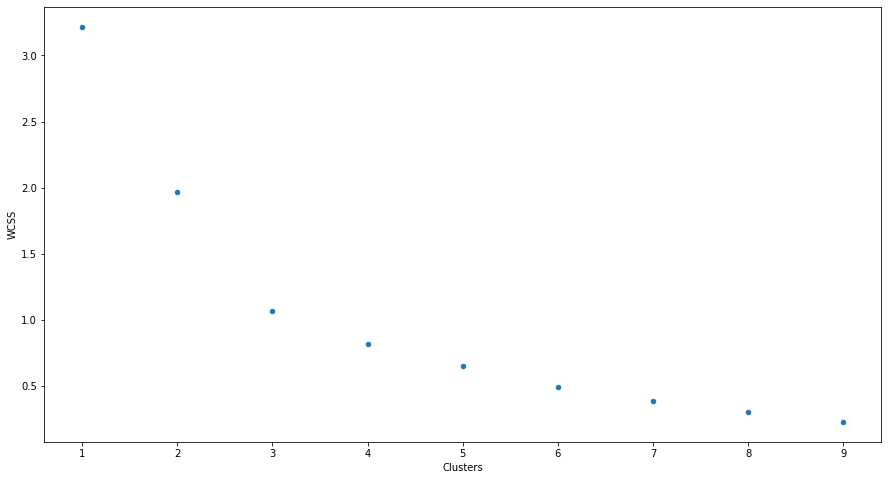

In [32]:
# Plotting elbow

centers.plot.scatter(x = 'Clusters', y = 'WCSS', figsize=(15,8))

We can see in the above graph the explained variation as a function of the number of clusters. The elbow of the curve in this case is k = 3 as the number of clusters to use.

To ensure that this amount of cluster is appropriate, we proceed to corroborate it with the Silhouette method.

In [33]:
# Silhouette method to indetify the best K clusters

for i in range(2,10):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=0).fit(caba_grouped_clustering).labels_
    print ("Silhouette score for k = "+str(i)+"(clusters) is "+str(metrics.silhouette_score(caba_grouped_clustering,labels,metric="euclidean",random_state=0)))

Silhouette score for k = 2(clusters) is 0.41841303408853303
Silhouette score for k = 3(clusters) is 0.4459333520668169
Silhouette score for k = 4(clusters) is 0.3422741180343111
Silhouette score for k = 5(clusters) is 0.28756087544124714
Silhouette score for k = 6(clusters) is 0.2702451620281194
Silhouette score for k = 7(clusters) is 0.1881355835457263
Silhouette score for k = 8(clusters) is 0.178412665788756
Silhouette score for k = 9(clusters) is 0.18666878808806045


we can see above silhouette values as a measure of how similar an object is to its own group compared to other groups. The maximum value here is 3 K clusters, the same as the Elbow method throwed, so 3 K clusters is the correct option.

Now we can proceed to execute the K-mean algorithm to obtain the clusters, with a value of K = 3.

In [34]:
kclusters = 3

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(caba_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1], dtype=int32)

In [35]:
# Add clustering labels
neighborhoods_restaurants_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

caba_merged = neighborhoods

# Merge neighborhoods_restaurants_sorted with neighborhoods to add latitude/longitude for each neighborhood
caba_merged = caba_merged.join(neighborhoods_restaurants_sorted.set_index('Neighborhood'), on='Neighborhood')

# Change column to type int
caba_merged = caba_merged.dropna()
caba_merged['Cluster Labels'] = caba_merged['Cluster Labels'].astype(int)
caba_merged

,Commune,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,1,"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...",-34.6152,-58.3738,0,Argentinian Restaurant,Italian Restaurant,Japanese Restaurant,Fondue Restaurant,Vegetarian / Vegan Restaurant,Swiss Restaurant,Restaurant,Mediterranean Restaurant,German Restaurant,French Restaurant
1,2,RECOLETA,-34.5906,-58.3906,0,Argentinian Restaurant,Italian Restaurant,Restaurant,Empanada Restaurant,French Restaurant,Peruvian Restaurant,Spanish Restaurant,South American Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant
2,3,"BALVANERA, SAN CRISTOBAL",-34.6107,-58.4068,0,Fast Food Restaurant,Peruvian Restaurant,Argentinian Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Spanish Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant
3,4,"BARRACAS, BOCA, NUEVA POMPEYA, PARQUE PATRICIOS",-34.6464,-58.3843,2,Argentinian Restaurant,Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,American Restaurant,Japanese Restaurant
4,5,"ALMAGRO, BOEDO",-34.6152,-58.4252,0,Argentinian Restaurant,Restaurant,Sushi Restaurant,Spanish Restaurant,Italian Restaurant,Paella Restaurant,Food Service,Fast Food Restaurant,Eastern European Restaurant,Mexican Restaurant
5,6,CABALLITO,-34.6183,-58.4367,0,Argentinian Restaurant,Restaurant,Sushi Restaurant,Fast Food Restaurant,Empanada Restaurant,Food Service,Spanish Restaurant,Italian Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant
6,7,"FLORES, PARQUE CHACABUCO",-34.6318,-58.4620,0,South American Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,American Restaurant
7,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI",-34.6754,-58.4637,1,Fast Food Restaurant,American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,Restaurant,South American Restaurant,Japanese Restaurant
8,9,"LINIERS, MATADEROS, PARQUE AVELLANEDA",-34.6449,-58.5112,0,Argentinian Restaurant,Sushi Restaurant,Spanish Restaurant,Peruvian Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,American Restaurant
9,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...",-34.6243,-58.5043,2,Argentinian Restaurant,Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,American Restaurant,Japanese Restaurant


Let's extract the 3 most common restaurants in each cluster in order to understand the trend that each cluster presents.

In [36]:
# Extracting 1st Most Common restaurants

first_most_common_restaurant = caba_merged
first_most_common_restaurant = first_most_common_restaurant.drop(['Commune','Neighborhood', 'Latitude', 'Longitude'], axis=1)
first_most_common_restaurant = first_most_common_restaurant.groupby(['Cluster Labels','1st Most Common Restaurant']).size()
first_most_common_restaurant

Cluster Labels  1st Most Common Restaurant
0               Argentinian Restaurant        8
                Fast Food Restaurant          1
                Italian Restaurant            1
                South American Restaurant     1
1               Fast Food Restaurant          1
2               Argentinian Restaurant        3
dtype: int64

In [37]:
# Extracting 2nd Most Common restaurants

second_most_common_restaurant = caba_merged
second_most_common_restaurant = second_most_common_restaurant.drop(['Commune','Neighborhood', 'Latitude', 'Longitude'], axis=1)
second_most_common_restaurant = second_most_common_restaurant.groupby(['Cluster Labels','2nd Most Common Restaurant']).size()
second_most_common_restaurant

Cluster Labels  2nd Most Common Restaurant
0               Fast Food Restaurant          1
                Italian Restaurant            3
                Peruvian Restaurant           2
                Restaurant                    4
                Sushi Restaurant              1
1               American Restaurant           1
2               Food & Drink Shop             1
                Restaurant                    2
dtype: int64

In [38]:
# Extracting 3rd Most Common restaurants

third_most_common_restaurant = caba_merged
third_most_common_restaurant = third_most_common_restaurant.drop(['Commune','Neighborhood', 'Latitude', 'Longitude'], axis=1)
third_most_common_restaurant = third_most_common_restaurant.groupby(['Cluster Labels','3rd Most Common Restaurant']).size()
third_most_common_restaurant

Cluster Labels  3rd Most Common Restaurant
0               Argentinian Restaurant        2
                Japanese Restaurant           1
                Middle Eastern Restaurant     1
                Restaurant                    2
                Spanish Restaurant            2
                Sushi Restaurant              3
1               Mediterranean Restaurant      1
2               American Restaurant           1
                Latin American Restaurant     2
dtype: int64

In [39]:
# Concatenating 1st, 2nd and 3rd most common restaurant in one dataframe

cluster_most_common = pd.concat([first_most_common_restaurant, second_most_common_restaurant, third_most_common_restaurant], axis=1)
cluster_most_common = cluster_most_common.rename(columns={0: "first_most_common_restaurant", 1: "second_most_common_restaurant", 2: "third_most_common_restaurant"})
cluster_most_common = cluster_most_common.fillna(0).astype(int)
cluster_most_common


first_most_common_restaurant  \
Cluster Labels                                                           
0              Argentinian Restaurant                                8   
               Fast Food Restaurant                                  1   
               Italian Restaurant                                    1   
               Japanese Restaurant                                   0   
               Middle Eastern Restaurant                             0   
               Peruvian Restaurant                                   0   
               Restaurant                                            0   
               South American Restaurant                             1   
               Spanish Restaurant                                    0   
               Sushi Restaurant                                      0   
1              American Restaurant                                   0   
               Fast Food Restaurant                                  1   
               Mediterranean Restaurant                              0   
2              American Restaurant                                   0   
               Argentinian Restaurant                                3   
               Food & Drink Shop                                     0   
               Latin American Restaurant                             0   
               Restaurant                                            0   

                                          second_most_common_restaurant  \
Cluster Labels                                                            
0              Argentinian Restaurant                                 0   
               Fast Food Restaurant                                   1   
               Italian Restaurant                                     3   
               Japanese Restaurant                                    0   
               Middle Eastern Restaurant                              0   
               Peruvian Restaurant                                    2   
               Restaurant                                             4   
               South American Restaurant                              0   
               Spanish Restaurant                                     0   
               Sushi Restaurant                                       1   
1              American Restaurant                                    1   
               Fast Food Restaurant                                   0   
               Mediterranean Restaurant                               0   
2              American Restaurant                                    0   
               Argentinian Restaurant                                 0   
               Food & Drink Shop                                      1   
               Latin American Restaurant                              0   
               Restaurant                                             2   

                                          third_most_common_restaurant  
Cluster Labels                                                          
0              Argentinian Restaurant                                2  
               Fast Food Restaurant                                  0  
               Italian Restaurant                                    0  
               Japanese Restaurant                                   1  
               Middle Eastern Restaurant                             1  
               Peruvian Restaurant                                   0  
               Restaurant                                            2  
               South American Restaurant                             0  
               Spanish Restaurant                                    2  
               Sushi Restaurant                                      3  
1              American Restaurant                                   0  
               Fast Food Restaurant                                  0  
               Mediterranean Restauran

Examining the above table we can say that:
* Cluster 0: Argentinian, Fast food, italian, japanese, middle eastern, peruvian, south american, spanish and sushi restaurant are the most common in this cluster. 
* Cluster 1: American, Fast food and mediterranean are the most common in this cluster.
* Cluster 2: American, argentinian, food & drink and latin american are the most common in this cluster.

Now that we know the characteristics of each cluster, let's examine the top 10 foreign population of each cluster.

,Birthplace,Total_foreign-born_population
0,Perú,46143
1,Bolivia,45350
2,Paraguay,42679
3,Resto de América,26770
4,Uruguay,23824
5,España,20084
6,Italia,15419
7,Resto de Europa,10882
8,Brasil,9282
9,Chile,8103


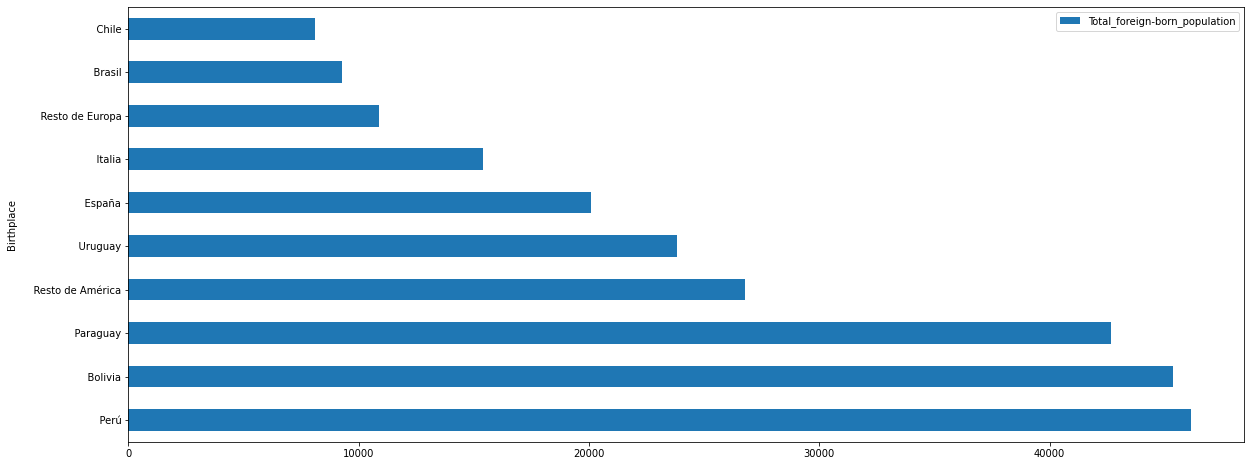

In [40]:
# Getting top 10 foreign population of cluster 0

cluster_0_foreign_born = pd.concat([commune_1_foreign, commune_2_foreign, commune_3_foreign, commune_5_foreign, commune_6_foreign, commune_7_foreign, commune_9_foreign, 
                                    commune_11_foreign, commune_13_foreign, commune_14_foreign, commune_15_foreign]).groupby('Birthplace').sum().reset_index()
cluster_0_foreign_born = cluster_0_foreign_born.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

cluster_0_foreign_born.head(10).plot(kind='barh', x='Birthplace', y='Total_foreign-born_population', figsize=(20,8),width = 0.5)
cluster_0_foreign_born.head(10)

,Birthplace,Total_foreign-born_population
0,Bolivia,20365
1,Paraguay,16597
2,Perú,2265
3,Italia,1688
4,Uruguay,941
5,España,841
6,Chile,309
7,Resto de América,237
8,Resto de Europa,164
9,Brasil,149


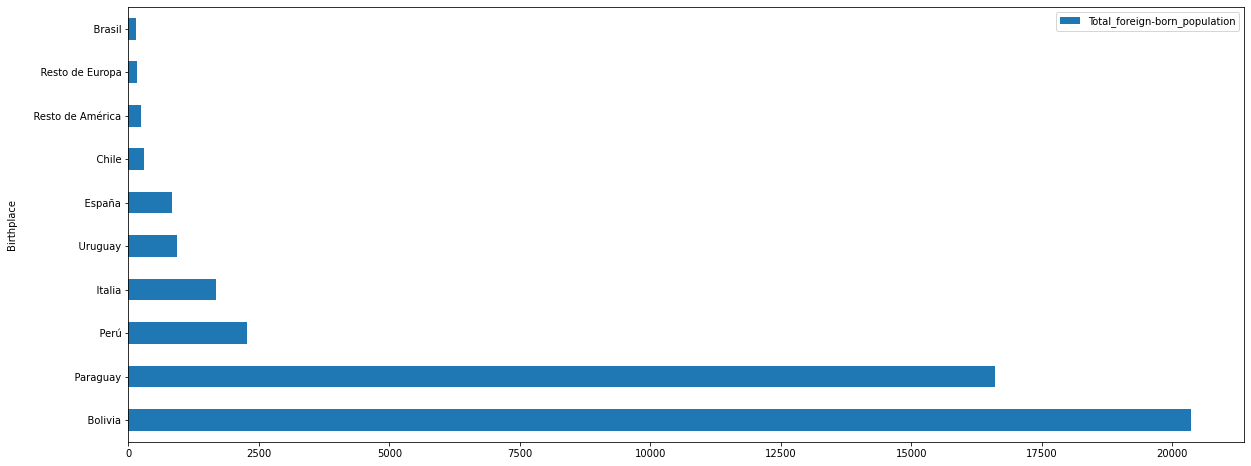

In [41]:
# Getting top 10 foreign population of cluster 1

cluster_1_foreign_born = commune_8_foreign

cluster_1_foreign_born.head(10).plot(kind='barh', x='Birthplace', y='Total_foreign-born_population', figsize=(20,8),width = 0.5)
cluster_1_foreign_born.head(10)

,Birthplace,Total_foreign-born_population
0,Paraguay,21874
1,Perú,12392
2,Bolivia,11021
3,Uruguay,6435
4,España,5356
5,Italia,4606
6,Resto de América,3988
7,Resto de Europa,2147
8,Chile,1778
9,Brasil,1423


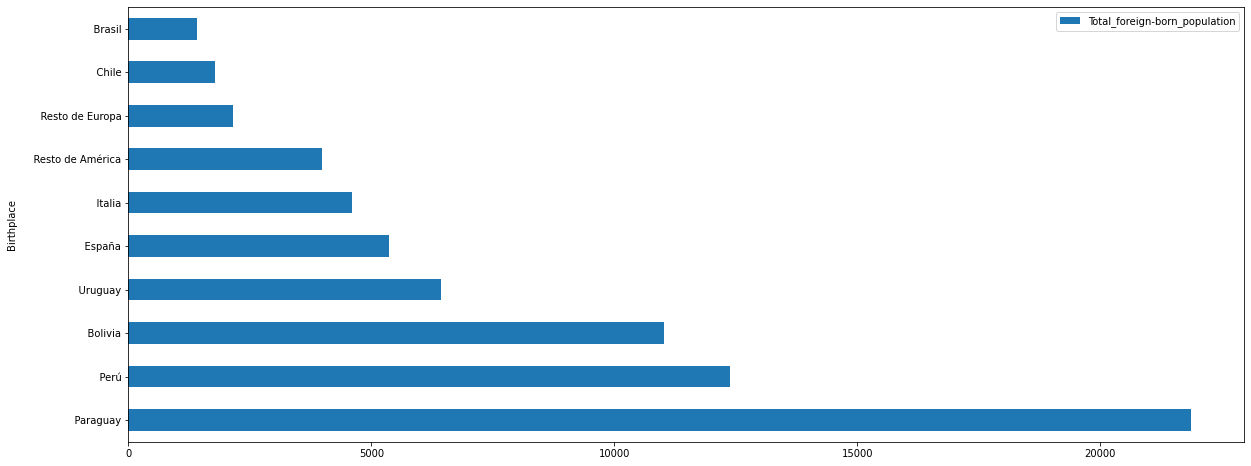

In [42]:
# Getting top 10 foreign population of cluster 2

cluster_2_foreign_born = pd.concat([commune_4_foreign, commune_10_foreign, commune_13_foreign]).groupby('Birthplace').sum().reset_index()
cluster_2_foreign_born = cluster_2_foreign_born.sort_values(by=['Total_foreign-born_population'], ascending=False).reset_index(drop=True)

cluster_2_foreign_born.head(10).plot(kind='barh', x='Birthplace', y='Total_foreign-born_population', figsize=(20,8),width = 0.5)
cluster_2_foreign_born.head(10)

We already know the predominant foreign population of each cluster.

Now we can proceed to identify the density of restaurants in each commune.

In [43]:
# Getting number of restaurants per neighborhood.

caba_restaurants.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"AGRONOMIA, CHACARITA, PARQUE CHAS, PATERNAL, VILLA CRESPO, VILLA ORTUZAR",9,9,9,9,9,9
"ALMAGRO, BOEDO",20,20,20,20,20,20
"BALVANERA, SAN CRISTOBAL",21,21,21,21,21,21
"BARRACAS, BOCA, NUEVA POMPEYA, PARQUE PATRICIOS",3,3,3,3,3,3
"BELGRANO, COLEGIALES, NUÑEZ",24,24,24,24,24,24
CABALLITO,24,24,24,24,24,24
"COGHLAN, SAAVEDRA, VILLA PUEYRREDON, VILLA URQUIZA",7,7,7,7,7,7
"CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO, SAN NICOLAS, SAN TELMO",27,27,27,27,27,27
"FLORES, PARQUE CHACABUCO",4,4,4,4,4,4


we can visualize the number of restaurants per commune in the following graph.

<AxesSubplot:xlabel='Commune'>

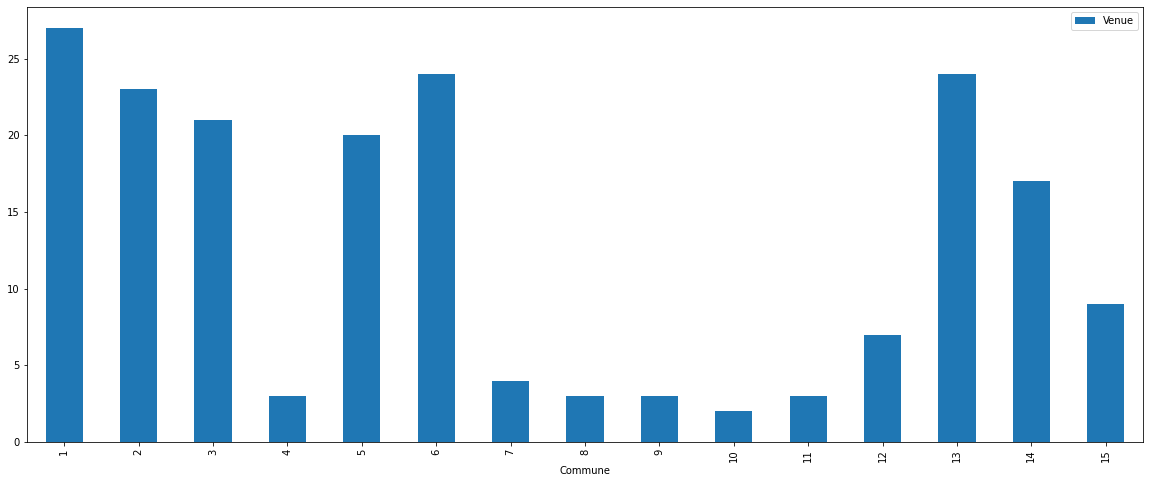

In [44]:
caba_restaurants_per_commune = pd.merge(caba_restaurants.groupby('Neighborhood').count(), neighborhoods, on='Neighborhood').sort_values(by=['Commune'], ascending=True)
caba_restaurants_per_commune.plot(kind='bar',x = 'Commune', y = 'Venue', figsize=(20,8),width = 0.5)

We can also view it in a choropleth map.

In [45]:
# Number of restaurants in the city of buenos aires

caba_count_restaurants = folium.Map(location=[latitude, longitude], zoom_start=12)

caba_count_restaurants.choropleth(
    geo_data=neighborhoods_geojson,
    data=pd.merge(caba_restaurants.groupby('Neighborhood').count(), neighborhoods, on='Neighborhood'),
    columns=['Commune','Venue'],
    key_on='feature.properties.COMUNAS',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name="Amount of restaurants"
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, commune, cluster in zip(caba_merged['Latitude'], caba_merged['Longitude'], caba_merged['Commune'], caba_merged['Cluster Labels']):
    label = folium.Popup('Commune '+ str(commune) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(caba_count_restaurants)
  


caba_count_restaurants

## 5. Results and Discussion <a name="results"></a>

Our analysis shows that there is a great number of restaurants in Buenos Aires, but the highest concentration of restaurants was detected in commune 1, 2, 3, 5, 6, 13 and 14, so we focused our attention to all the others communes where the competention is not so high. These communes are 4, 7, 8, 9, 10, 11, 12 and 15.

With these last communes, we find in the cluster 0, commune 7, 9, 11 and 15. The foreign population that predominates in this cluster are from Peru, Bolivia and Paraguay. At the same time, the predominant restaurants in this cluster are peruvian and south american restaurants, among others, so we discard these communes.

In cluster 2, we have commune 4, 10 and 12. The foreign population that predominates in this cluster are from Paraguay, Peru and Bolivia. The predominant restaurants in this cluster are latin american restaurants, among others, so we also discard these communes.

In cluster 1, we have left commune 8. The foreign population that predominates in this cluster are from Bolivia, Paraguay and Peru. The predominant restaurants in this cluster are american, Fast food and mediterranean restaurants. Therefore, we can observe that restaurants of typical food from these countries do not predominate in this cluster. This is why the neighborhoods that make up commune 8 (VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI) are presented as a potential area to open a bolivian, paraguayan, peruvian or Latin American restaurant.

This, of course, does not imply that this zone is actually an optimal location for a new restaurant! Purpose of this analysis was to only provide information on areas with poor competence and to look for an area where foreigners do not have restaurants with typical food from their countries in the areas close to their homes. Therefore, the recommended areas should be considered only as a starting point for a more detailed analysis that could eventually result in a location that takes into consideration many more factors than were evaluated in this project.

## 6. Conclusion <a name="conclusion"></a>

The purpose of this project was to identify Buenos Aires communes with low number of restaurants aiming to find low competition in an area where the predominant foreigners do not have nearby restaurants with typical food from their country. For this, the restaurants of each commune and their foreign population were analyzed. Finally, it was possible to find an optimal area that meets the requirements that were defined and the type of restaurant to open.